In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## data procecessing

In [2]:
batch_size=8
width = 256
hight = 256
train_path = "D:/Projects/crowdai_train/train"
val_path = "D:/Projects/crowdai_train/val"

In [104]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=40,
        fill_mode='nearest',
        horizontal_flip=True)
val_datagen = ImageDataGenerator()

In [4]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(width,hight),
        batch_size=batch_size,
        class_mode='categorical')

Found 20837 images belonging to 38 classes.


In [105]:
val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(width,hight),
        batch_size=batch_size,
        class_mode='categorical')

Found 1080 images belonging to 38 classes.


## Resnet Model

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [7]:
resnet50 = ResNet50(include_top=False,input_shape=(width,hight,3))

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [8]:
resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 128, 128, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(resnet50)
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(38, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [10]:
model.fit_generator(
        generator=train_generator,
        steps_per_epoch=512//batch_size,
        epochs=150,
        validation_data=val_generator,
        validation_steps=128//batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
2605/2605 [==============================] - 471s 181ms/step - loss: 1.6225 - categorical_accuracy: 0.5480 - val_loss: 3.6416 - val_categorical_accuracy: 0.0065
Epoch 2/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.7701 - categorical_accuracy: 0.7613 - val_loss: 3.7582 - val_categorical_accuracy: 0.0093
Epoch 3/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.5411 - categorical_accuracy: 0.8266 - val_loss: 3.6461 - val_categorical_accuracy: 0.0093
Epoch 4/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.4328 - categorical_accuracy: 0.8631 - val_loss: 3.6542 - val_categorical_accuracy: 0.0046
Epoch 5/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.3883 - categorical_accuracy: 0.8756 - val_loss: 3.6557 - val_categorical_accuracy: 0.0046
Epoch 6/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.3470

Epoch 30/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.1489 - categorical_accuracy: 0.9535 - val_loss: 3.6979 - val_categorical_accuracy: 0.0046
Epoch 31/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.1288 - categorical_accuracy: 0.9597 - val_loss: 3.7000 - val_categorical_accuracy: 0.0046
Epoch 32/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.1175 - categorical_accuracy: 0.9602 - val_loss: 3.6981 - val_categorical_accuracy: 0.0046
Epoch 33/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.1319 - categorical_accuracy: 0.9582 - val_loss: 3.6995 - val_categorical_accuracy: 0.0046
Epoch 34/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.1289 - categorical_accuracy: 0.9596 - val_loss: 3.6995 - val_categorical_accuracy: 0.0074
Epoch 35/150
2605/2605 [==============================] - 466s 179ms/step - loss: 0.1282 - categorical_accuracy: 0.9577 - val_loss

Epoch 60/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.0919 - categorical_accuracy: 0.9697 - val_loss: 3.7314 - val_categorical_accuracy: 0.0074
Epoch 61/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0937 - categorical_accuracy: 0.9698 - val_loss: 3.7314 - val_categorical_accuracy: 0.0074
Epoch 62/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0853 - categorical_accuracy: 0.9737 - val_loss: 3.7355 - val_categorical_accuracy: 0.0074
Epoch 63/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0884 - categorical_accuracy: 0.9733 - val_loss: 3.7385 - val_categorical_accuracy: 0.0074
Epoch 64/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0947 - categorical_accuracy: 0.9716 - val_loss: 3.7380 - val_categorical_accuracy: 0.0074
Epoch 65/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0916 - categorical_accuracy: 0.9709 - val_loss

Epoch 90/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0752 - categorical_accuracy: 0.9768 - val_loss: 3.7842 - val_categorical_accuracy: 0.0093
Epoch 91/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0710 - categorical_accuracy: 0.9773 - val_loss: 3.7915 - val_categorical_accuracy: 0.0074
Epoch 92/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.0704 - categorical_accuracy: 0.9803 - val_loss: 3.7892 - val_categorical_accuracy: 0.0074
Epoch 93/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0706 - categorical_accuracy: 0.9789 - val_loss: 3.7860 - val_categorical_accuracy: 0.0074
Epoch 94/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.0682 - categorical_accuracy: 0.9791 - val_loss: 3.7920 - val_categorical_accuracy: 0.0074
Epoch 95/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0894 - categorical_accuracy: 0.9733 - val_loss

2605/2605 [==============================] - 466s 179ms/step - loss: 0.0583 - categorical_accuracy: 0.9839 - val_loss: 3.8315 - val_categorical_accuracy: 0.0074
Epoch 120/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.0575 - categorical_accuracy: 0.9829 - val_loss: 3.8321 - val_categorical_accuracy: 0.0074
Epoch 121/150
2605/2605 [==============================] - 465s 179ms/step - loss: 0.0674 - categorical_accuracy: 0.9811 - val_loss: 3.8252 - val_categorical_accuracy: 0.0074
Epoch 122/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.0625 - categorical_accuracy: 0.9820 - val_loss: 3.8339 - val_categorical_accuracy: 0.0074
Epoch 123/150
2605/2605 [==============================] - 465s 178ms/step - loss: 0.0656 - categorical_accuracy: 0.9816 - val_loss: 3.8387 - val_categorical_accuracy: 0.0074
Epoch 124/150
2605/2605 [==============================] - 464s 178ms/step - loss: 0.0534 - categorical_accuracy: 0.9835 - val_loss: 3.8414

2605/2605 [==============================] - 464s 178ms/step - loss: 0.0541 - categorical_accuracy: 0.9845 - val_loss: 3.8782 - val_categorical_accuracy: 0.0074
Epoch 149/150
2605/2605 [==============================] - 466s 179ms/step - loss: 0.0471 - categorical_accuracy: 0.9869 - val_loss: 3.8777 - val_categorical_accuracy: 0.0074
Epoch 150/150
2605/2605 [==============================] - 467s 179ms/step - loss: 0.0536 - categorical_accuracy: 0.9849 - val_loss: 3.8776 - val_categorical_accuracy: 0.0074


In [11]:
model.save("resnet50.h5")

In [12]:
history = model.history

In [13]:
import pandas as pd
import sys,os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

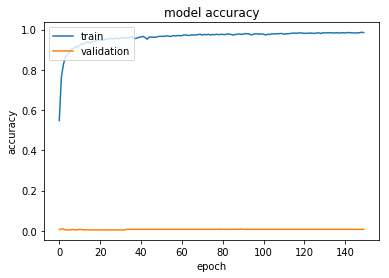

In [14]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

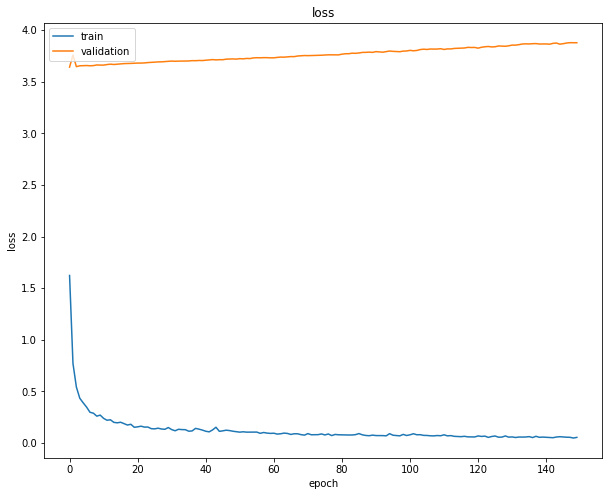

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [57]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,1.622323,0.547968,3.641576,0.006481
1,0.769980,0.761290,3.758228,0.009259
2,0.541094,0.826607,3.646118,0.009259
3,0.432804,0.863080,3.654211,0.004630
4,0.388339,0.875558,3.655684,0.004630


In [58]:
history_df.to_csv("resnet50.csv")

In [16]:
from sklearn.metrics import confusion_matrix

In [106]:
prediction = model.predict_generator(val_generator,steps=val_generator.samples/batch_size,verbose=0)

In [107]:
y_pred = np.argmax(prediction,axis=1)
print('Confusion Matrix')
cnf_matrix = confusion_matrix(val_generator.classes, y_pred)
print(cnf_matrix)

Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [108]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.viridis):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


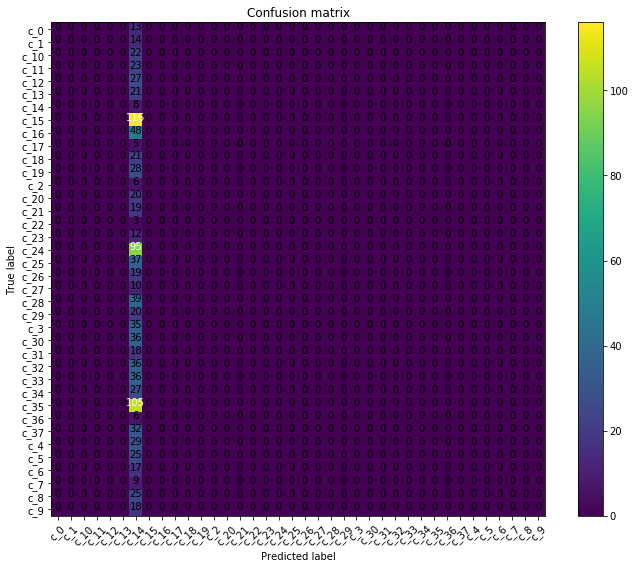

In [109]:
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(val_generator.class_indices.keys()),
                      title='Confusion matrix')